In [4]:
# Install geopandas and descartes libraries
!conda install --yes geopandas descartes

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - descartes -> python[version='>=2.7,<2.8.0a0|>=3.7,<3.8.0a0|>=3.6,<3.7.0a0|>=3.5,<3.6.0a0']

Your python: python=3.9

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrain

In [13]:
import pandas as pd
import geopandas as gpd
import descartes
import matplotlib.pyplot as plt

## Pandas + Pandas Dataframes

First Let's talk about pandas

## Geopandas

Now geopandas

<class 'geopandas.geodataframe.GeoDataFrame'>


<AxesSubplot:>

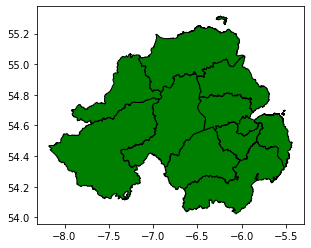

In [4]:
districts = gpd.read_file(r'/Users/ep9k/Desktop/Shapefiles/districts.shp')
print(type(districts))
districts.plot(color='green', edgecolor='black')

<AxesSubplot:>

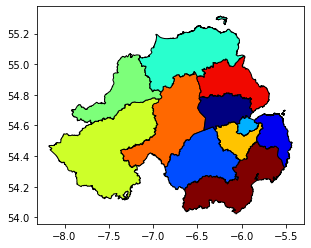

In [10]:
#use attributes table
districts.plot(cmap='jet', column ='district', edgecolor='black' )
# 'jet' value comes from matplotlib library. Geopandas is built upon pandas, matplotlib, numpy, etc. and allows some of this functionality

In [7]:
print(districts['district'])


0                   Newry, Mourne and Down
1                               Mid Ulster
2                      Mid and East Antrim
3                  Lisburn and Castlereagh
4     Armagh City, Banbridge and Craigavon
5                  Antrim and Newtownabbey
6                      Ards and North Down
7                      Fermanagh and Omagh
8                  Derry City and Strabane
9                 Causeway Coast and Glens
10                                 Belfast
Name: district, dtype: object


<AxesSubplot:>

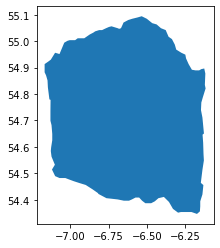

In [11]:
area_of_interest = gpd.read_file(r'/Users/ep9k/Desktop/Shapefiles/area_of_interest.shp')
area_of_interest.plot()

<AxesSubplot:>

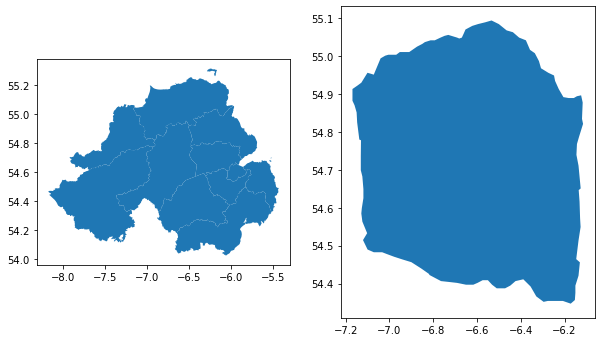

In [23]:
## Plot figures side by side with matplotlib

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,8))
districts.plot(ax = ax1)
area_of_interest.plot(ax = ax2)


<AxesSubplot:>

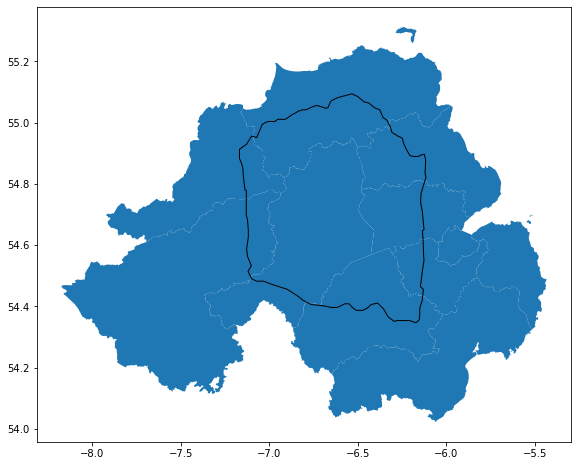

In [29]:
## plot as different layers on top of each other. Stack them on top of each other
## we are not just limited to two layers when plotting
fig, ax = plt.subplots(figsize=(10,8))
districts.plot(ax=ax)
area_of_interest.plot(ax=ax, color='none', edgecolor='black')

In [30]:
atms = gpd.read_file(r'/Users/ep9k/Desktop/Shapefiles/atms.shp')

           operator                        geometry
0     Northern Bank  MULTIPOINT (-6.65841 54.50122)
1              None  MULTIPOINT (-6.22666 54.72956)
2   Bank of Ireland  MULTIPOINT (-6.22038 54.80819)
3              None  MULTIPOINT (-6.29858 54.43323)
4              None  MULTIPOINT (-6.21401 54.59141)
5       Danske Bank  MULTIPOINT (-6.27410 54.86649)
6   Bank of Ireland  MULTIPOINT (-6.27348 54.86643)
7              None  MULTIPOINT (-6.55924 54.95108)
8       Ulster Bank  MULTIPOINT (-6.15534 54.64155)
9              None  MULTIPOINT (-6.29950 54.84793)
10      Ulster Bank  MULTIPOINT (-6.29103 54.86986)
11             None  MULTIPOINT (-6.35607 54.85205)
12             None  MULTIPOINT (-6.70580 54.81173)
13             None  MULTIPOINT (-6.47669 54.87288)
14             None  MULTIPOINT (-6.21685 54.66157)
15             None  MULTIPOINT (-6.41766 54.43509)
16             None  MULTIPOINT (-6.42748 54.42270)
17             None  MULTIPOINT (-6.43466 54.42826)
18          

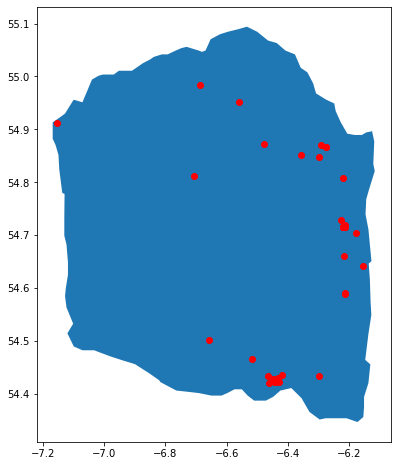

In [35]:
fig, ax = plt.subplots(figsize=(10,8))
area_of_interest.plot(ax=ax)
atms.plot(ax=ax, color='red')
print(atms)

## Map Projections!

Map projections and coordinate reference systems are important in mapping and GIS


In [41]:
# see the crs for the given layer
districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [52]:
# you can change coordinate reference systems
# reprojecting geopandas geodataframes

districts = districts.to_crs(epsg = 32629)
area_of_interest = area_of_interest.to_crs(epsg = 32629)

<AxesSubplot:>

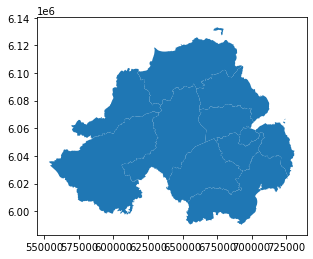

In [47]:
#now using a projected coordinate system and now using meters as the unit of measurement
districts.plot()

<AxesSubplot:>

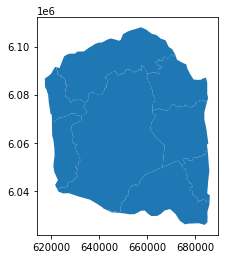

In [54]:
## Intersecting layers

districts_in_aoi = gpd.overlay(districts, area_of_interest, how='intersection')
districts_in_aoi.plot()